In [1]:
!wget "https://he-public-data.s3.ap-southeast-1.amazonaws.com/shell_dataset.zip"

--2021-11-04 18:48:03--  https://he-public-data.s3.ap-southeast-1.amazonaws.com/shell_dataset.zip
Resolving he-public-data.s3.ap-southeast-1.amazonaws.com (he-public-data.s3.ap-southeast-1.amazonaws.com)... 52.219.40.199
Connecting to he-public-data.s3.ap-southeast-1.amazonaws.com (he-public-data.s3.ap-southeast-1.amazonaws.com)|52.219.40.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3467218047 (3.2G) [binary/octet-stream]
Saving to: ‘shell_dataset.zip’

shell_dataset.zip   100%[===================>]   3.23G  14.3MB/s    in 3m 54s  

2021-11-04 18:51:58 (14.1 MB/s) - ‘shell_dataset.zip’ saved [3467218047/3467218047]



In [2]:
!pip install neuralprophet

     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 155 kB 10.6 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [3]:
!unzip -q "shell_dataset.zip"
!unzip -q "dataset/train.zip"
!unzip -q "dataset/test.zip"

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [61]:
train = pd.read_csv('train/train.csv')
train.corr()['Total Cloud Cover [%]']

Global CMP22 (vent/cor) [W/m^2]         -0.021712
Direct sNIP [W/m^2]                     -0.033051
Azimuth Angle [degrees]                  0.004830
Tower Dry Bulb Temp [deg C]             -0.014412
Tower Wet Bulb Temp [deg C]             -0.012123
Tower Dew Point Temp [deg C]            -0.004227
Tower RH [%]                             0.012812
Total Cloud Cover [%]                    1.000000
Peak Wind Speed @ 6ft [m/s]             -0.004910
Avg Wind Direction @ 6ft [deg from N]   -0.004076
Station Pressure [mBar]                 -0.006564
Precipitation (Accumulated) [mm]         0.001280
Snow Depth [cm]                         -0.001874
Moisture                                 0.009790
Albedo (CMP11)                           0.008122
Name: Total Cloud Cover [%], dtype: float64

In [62]:
tdf = pd.read_csv('dataset/test.csv')

In [63]:
tdf = tdf.set_index('scenario_set')

In [64]:
tdf

,30_min_horizon,60_min_horizon,90_min_horizon,120_min_horizon
scenario_set,,,,
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
...,...,...,...,...
296,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN


In [65]:
path = 'test/'+str(7)+'/weather_data.csv'
df = pd.read_csv(path)

In [66]:
todays_date = datetime.now().date()
index = pd.date_range(todays_date, periods=482, freq='1min')
df = df.set_index(index[0:361])
df.drop('Time [Mins]',inplace=True,axis=1)


In [67]:
df

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
2021-11-04 00:00:00,859.713,976.289,117.24853,17.53,10.884,5.994,46.65,12,2.45,115.10,819.482,0.0,0.248,0.0,0.1834
2021-11-04 00:01:00,864.759,980.553,117.52476,17.72,11.114,6.334,47.19,13,1.95,125.40,819.466,0.0,0.124,0.0,0.1832
2021-11-04 00:02:00,868.189,982.672,117.80281,17.83,10.725,5.525,44.31,15,2.45,148.00,819.459,0.0,0.063,0.0,0.1833
2021-11-04 00:03:00,870.749,984.395,118.08270,17.81,10.928,5.838,45.34,16,0.95,190.00,819.467,0.0,0.093,0.0,0.1829
2021-11-04 00:04:00,869.147,979.738,118.36445,17.81,10.229,4.259,40.61,15,1.45,230.70,819.484,0.0,-0.355,0.0,0.1823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-04 05:56:00,644.455,932.895,260.92605,22.99,10.675,-0.025,21.71,15,3.70,44.12,817.178,0.0,0.121,0.0,0.2045
2021-11-04 05:57:00,639.923,928.775,261.10935,22.96,10.920,0.820,23.13,17,3.20,35.34,817.182,0.0,0.153,0.0,0.2043
2021-11-04 05:58:00,635.659,925.114,261.29202,22.95,10.860,0.570,22.73,17,2.45,48.44,817.216,0.0,0.131,0.0,0.2046
2021-11-04 05:59:00,632.859,924.217,261.47407,22.97,10.724,0.224,22.14,17,1.20,49.50,817.236,0.0,0.090,0.0,0.2047


In [68]:
df = df.resample('10min').mean()

In [69]:
df['Total Cloud Cover [%]'] = [np.NaN if (per < 0 or per > 100) else per for per in df['Total Cloud Cover [%]']]

In [70]:
df['Total Cloud Cover [%]'] = df['Total Cloud Cover [%]'].interpolate(method="polynomial", order=2)

In [71]:
df.drop(['Precipitation (Accumulated) [mm]','Moisture'],axis =1,inplace=True)

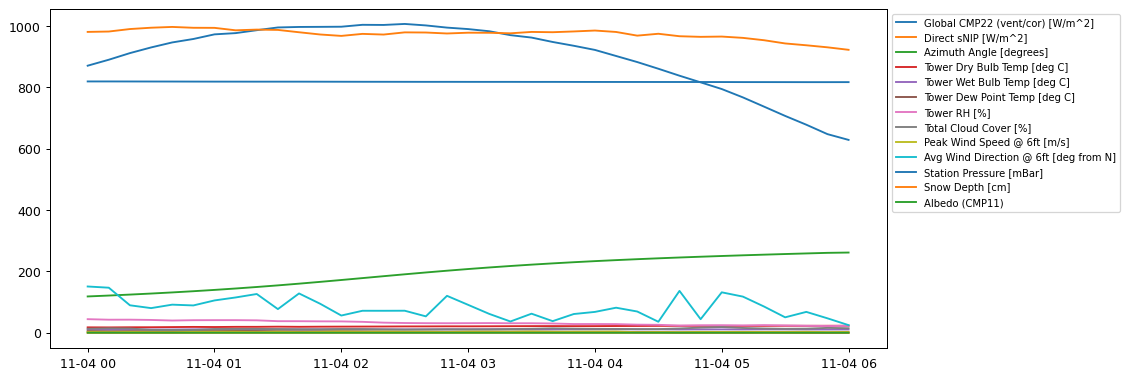

In [72]:
plt.figure(figsize=(12,5), dpi=90)
plt.plot(df)
plt.legend(df.columns,loc='upper left', fontsize=8,bbox_to_anchor=(1.0, 1.0))

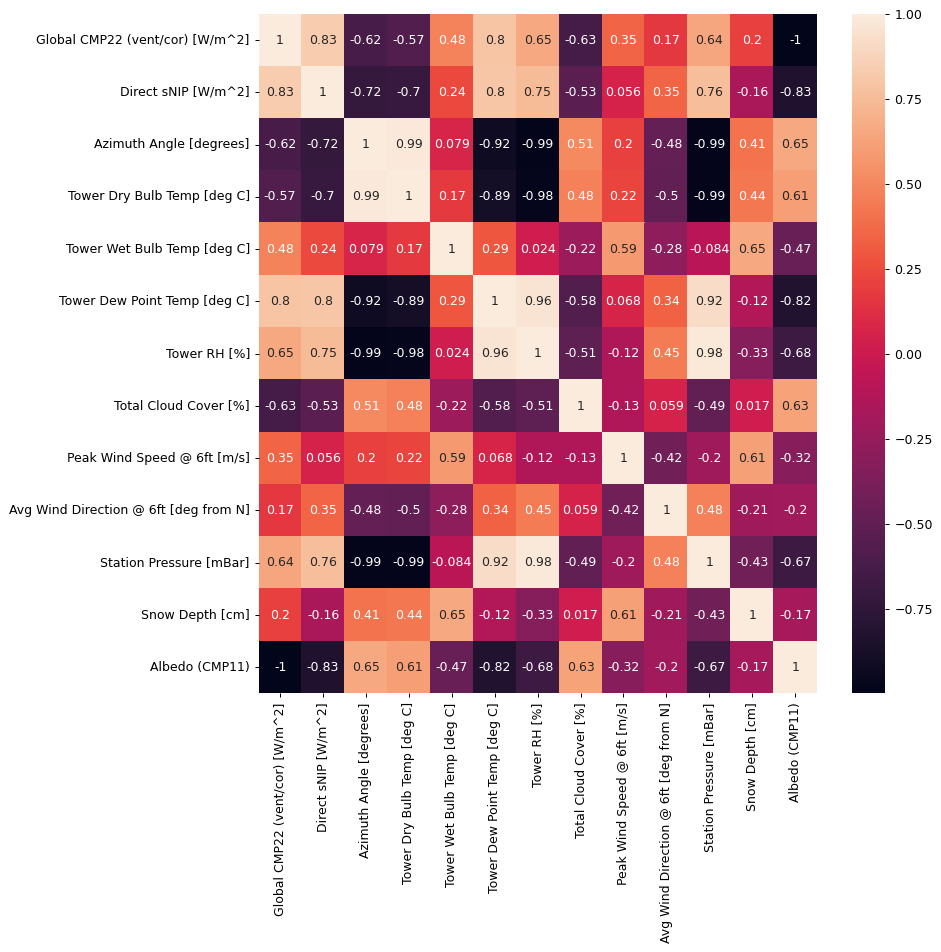

In [73]:
plt.figure(figsize=(10,10), dpi=90)
sns.heatmap(df.corr(),annot = True)

In [74]:
from neuralprophet import NeuralProphet

In [75]:
df.reset_index(inplace=True)
df

,index,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Snow Depth [cm],Albedo (CMP11)
0,2021-11-04 00:00:00,870.8182,980.9685,118.513848,17.752,10.7285,5.4895,44.449,13.3,2.500,150.9900,819.4775,0.0630,0.18228
1,2021-11-04 00:10:00,890.2803,982.2185,121.449763,17.568,10.3323,4.7523,42.707,14.6,2.000,147.0400,819.4708,0.0467,0.17958
2,2021-11-04 00:20:00,911.8615,990.2888,124.598928,18.028,10.7008,5.2108,42.825,14.0,2.630,89.6830,819.3793,-0.0138,0.17773
3,2021-11-04 00:30:00,930.3444,994.6250,127.986419,18.140,10.6584,4.9924,41.911,9.6,2.250,80.4760,819.2562,0.0734,0.17620
4,2021-11-04 00:40:00,946.6526,997.1905,131.638260,18.670,10.7848,4.8108,40.028,9.2,1.975,91.7630,819.1541,-0.0147,0.17470
5,2021-11-04 00:50:00,957.8757,994.4188,135.580197,19.198,11.3565,5.6625,41.090,9.0,3.000,89.2260,819.0041,0.0860,0.17337
6,2021-11-04 01:00:00,972.9751,994.1789,139.835773,18.839,11.1076,5.4006,41.258,12.3,3.100,105.5290,818.8912,0.1449,0.17249
7,2021-11-04 01:10:00,977.0211,986.1913,144.423532,19.425,11.5691,5.9221,41.249,12.7,3.400,115.2270,818.8626,0.2625,0.17181
8,2021-11-04 01:20:00,986.5299,988.4739,149.353285,19.448,11.4859,5.7379,40.656,12.7,2.425,126.4900,818.7828,0.2361,0.17069
9,2021-11-04 01:30:00,995.4841,987.4593,154.621671,19.982,11.4572,5.2032,37.903,12.1,3.550,77.2390,818.8056,0.1440,0.17010


In [76]:
df.columns
df1=df.drop([ 'Global CMP22 (vent/cor) [W/m^2]', 'Direct sNIP [W/m^2]',
       'Azimuth Angle [degrees]', 'Tower Dry Bulb Temp [deg C]',
       'Tower Wet Bulb Temp [deg C]', 'Tower Dew Point Temp [deg C]',
       'Tower RH [%]',  'Peak Wind Speed @ 6ft [m/s]',
       'Avg Wind Direction @ 6ft [deg from N]', 'Station Pressure [mBar]',
       'Snow Depth [cm]', 'Albedo (CMP11)'],axis=1)
df1=df1.rename(columns={'index':'ds','Total Cloud Cover [%]':'y'})
df1

,ds,y
0,2021-11-04 00:00:00,13.3
1,2021-11-04 00:10:00,14.6
2,2021-11-04 00:20:00,14.0
3,2021-11-04 00:30:00,9.6
4,2021-11-04 00:40:00,9.2
5,2021-11-04 00:50:00,9.0
6,2021-11-04 01:00:00,12.3
7,2021-11-04 01:10:00,12.7
8,2021-11-04 01:20:00,12.7
9,2021-11-04 01:30:00,12.1


In [77]:
m = NeuralProphet()

m.fit(df1,freq='10min')

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 409


  0%|          | 0/183 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.51E+01, min: 5.18E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.07E+01
Epoch[409/409]: 100%|██████████| 409/409 [00:06<00:00, 66.66it/s, SmoothL1Loss=0.00926, MAE=0.854, MSE=1.18, RegLoss=0]


,SmoothL1Loss,MAE,MSE,RegLoss
0,0.215314,4.640559,27.930340,0.0
1,0.035576,1.664497,4.553728,0.0
2,0.089754,3.070104,11.488479,0.0
3,0.080340,2.903615,10.283478,0.0
4,0.026661,1.563824,3.412551,0.0
...,...,...,...,...
404,0.009266,0.856390,1.186102,0.0
405,0.009257,0.854866,1.184895,0.0
406,0.009257,0.854122,1.184950,0.0
407,0.009258,0.853867,1.185036,0.0


In [78]:
future = m.make_future_dataframe(df1,periods=12)

In [79]:
future

,ds,y,t,y_scaled
0,2021-11-04 06:10:00,None,1.027778,NaN
1,2021-11-04 06:20:00,None,1.055556,NaN
2,2021-11-04 06:30:00,None,1.083333,NaN
3,2021-11-04 06:40:00,None,1.111111,NaN
4,2021-11-04 06:50:00,None,1.138889,NaN
5,2021-11-04 07:00:00,None,1.166667,NaN
6,2021-11-04 07:10:00,None,1.194444,NaN
7,2021-11-04 07:20:00,None,1.222222,NaN
8,2021-11-04 07:30:00,None,1.250000,NaN
9,2021-11-04 07:40:00,None,1.277778,NaN


In [80]:
forecast=m.predict(future)
forecast

,ds,y,yhat1,residual1,trend
0,2021-11-04 06:10:00,None,13.286882,NaN,13.286882
1,2021-11-04 06:20:00,None,12.814564,NaN,12.814564
2,2021-11-04 06:30:00,None,12.342247,NaN,12.342247
3,2021-11-04 06:40:00,None,11.869930,NaN,11.869930
4,2021-11-04 06:50:00,None,11.397615,NaN,11.397615
5,2021-11-04 07:00:00,None,10.925297,NaN,10.925297
6,2021-11-04 07:10:00,None,10.452980,NaN,10.452980
7,2021-11-04 07:20:00,None,9.980663,NaN,9.980663
8,2021-11-04 07:30:00,None,9.508345,NaN,9.508345
9,2021-11-04 07:40:00,None,9.036028,NaN,9.036028


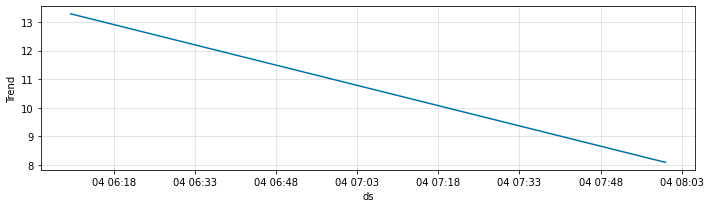

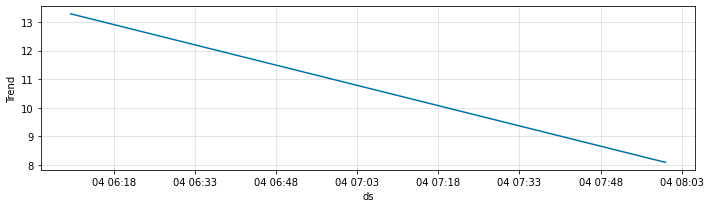

In [81]:
m.plot_components(forecast)

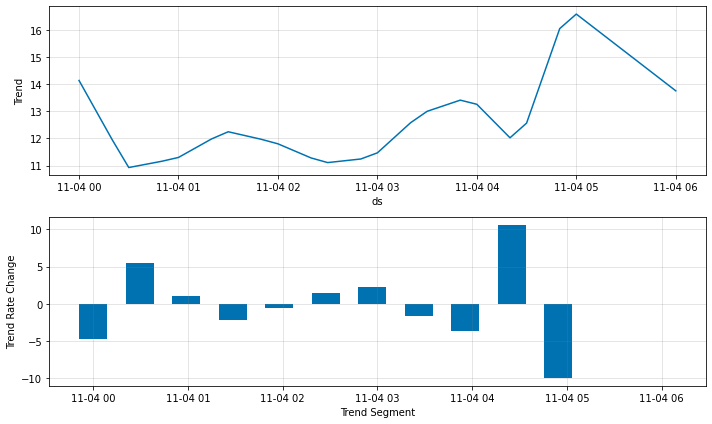

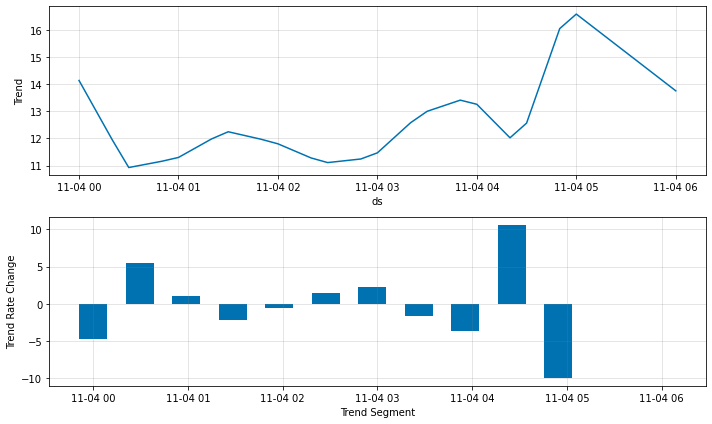

In [82]:
m.plot_parameters()

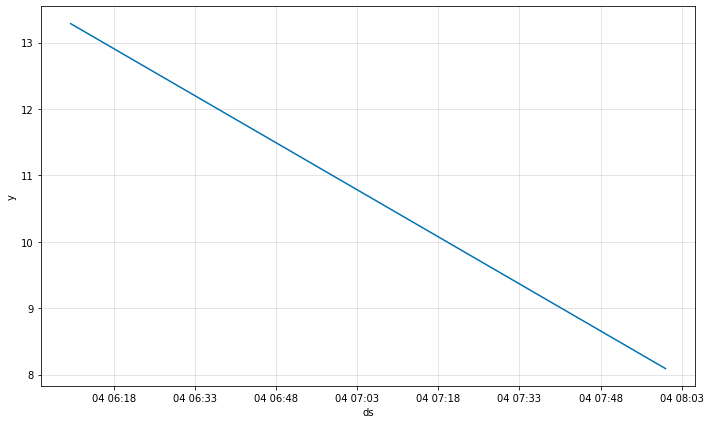

In [83]:
fig1=m.plot(forecast)

In [ ]:
for i in range(1,301):
  path = 'test/'+str(i)+'/weather_data.csv'
  df = pd.read_csv(path)
  todays_date = datetime.now().date()
  index = pd.date_range(todays_date, periods=482, freq='1min')
  df = df.set_index(index[0:361])
  df.drop('Time [Mins]',inplace=True,axis=1)
  df['Total Cloud Cover [%]'] = [np.NaN if (per < 0 or per > 100) else per for per in df['Total Cloud Cover [%]']]
  df['Total Cloud Cover [%]'] = df['Total Cloud Cover [%]'].interpolate()
  df['Total Cloud Cover [%]'].fillna(df['Total Cloud Cover [%]'].mean(),inplace = True)
  df.drop(['Precipitation (Accumulated) [mm]','Moisture'],axis =1,inplace=True)
  df.reset_index(inplace=True)
  df1=df.drop([ 'Global CMP22 (vent/cor) [W/m^2]', 'Direct sNIP [W/m^2]',
       'Azimuth Angle [degrees]', 'Tower Dry Bulb Temp [deg C]',
       'Tower Wet Bulb Temp [deg C]', 'Tower Dew Point Temp [deg C]',
       'Tower RH [%]',  'Peak Wind Speed @ 6ft [m/s]',
       'Avg Wind Direction @ 6ft [deg from N]', 'Station Pressure [mBar]',
       'Snow Depth [cm]', 'Albedo (CMP11)'],axis=1)
  df2=df1.rename(columns={'index':'ds','Total Cloud Cover [%]':'y'})

  model = NeuralProphet()
  model.fit(df2,freq='10min')
  predicted = model.make_future_dataframe(df2,periods=12)
  forecast = model.predict(predicted)
  tdf.loc[i,'30_min_horizon'] = forecast.loc[2,'trend']
  tdf.loc[i,'60_min_horizon'] = forecast.loc[5,'trend']
  tdf.loc[i,'90_min_horizon'] = forecast.loc[8,'trend']
  tdf.loc[i,'120_min_horizon'] = forecast.loc[11,'trend']
  print(i)
  

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 232


  0%|          | 0/228 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.02E-01, min: 4.49E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.30E+00
Epoch[232/232]: 100%|██████████| 232/232 [00:11<00:00, 20.27it/s, SmoothL1Loss=0.00266, MAE=1.46, MSE=4.78, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 232


  0%|          | 0/228 [00:00<?, ?it/s]

1


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.47E+01, min: 1.80E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.63E+00
Epoch[232/232]: 100%|██████████| 232/232 [00:11<00:00, 20.30it/s, SmoothL1Loss=0.00723, MAE=2.77, MSE=13.9, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 232


  0%|          | 0/228 [00:00<?, ?it/s]

2


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.28E+01, min: 5.39E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.15E+01
Epoch[232/232]: 100%|██████████| 232/232 [00:11<00:00, 20.48it/s, SmoothL1Loss=0.00481, MAE=0.484, MSE=0.346, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 232


  0%|          | 0/228 [00:00<?, ?it/s]

3


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.08E-02, min: 1.34E+01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.44E+00
Epoch[232/232]: 100%|██████████| 232/232 [00:11<00:00, 20.16it/s, SmoothL1Loss=0.00534, MAE=4.25, MSE=32.3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 232


  0%|          | 0/228 [00:00<?, ?it/s]

4


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.50E+00, min: 2.49E-07
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 8.08E-05
Epoch[232/232]: 100%|██████████| 232/232 [00:11<00:00, 20.18it/s, SmoothL1Loss=0.0922, MAE=20, MSE=642, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 232


  0%|          | 0/228 [00:00<?, ?it/s]

5


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.18E-01, min: 2.49E-07
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.70E-05
Epoch[232/232]: 100%|██████████| 232/232 [00:11<00:00, 19.66it/s, SmoothL1Loss=0.129, MAE=41.9, MSE=1.91e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 232


  0%|          | 0/228 [00:00<?, ?it/s]

6


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.61E-02, min: 1.61E+01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.44E+00
Epoch[232/232]: 100%|██████████| 232/232 [00:11<00:00, 19.84it/s, SmoothL1Loss=0.0128, MAE=1.23, MSE=2.57, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 232


  0%|          | 0/228 [00:00<?, ?it/s]

7


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.22E+01, min: 6.15E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.59E-01
Epoch[232/232]: 100%|██████████| 232/232 [00:11<00:00, 19.88it/s, SmoothL1Loss=0.0106, MAE=1.55, MSE=4.16, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 232


  0%|          | 0/228 [00:00<?, ?it/s]

8


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.18E-01, min: 2.49E-07
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.96E-05
Epoch[152/232]:  65%|██████▌   | 151/232 [00:07<00:04, 18.75it/s, SmoothL1Loss=0.328, MAE=65, MSE=5.17e+3, RegLoss=0]

In [ ]:
tdf.to_csv('sol.csv')

In [ ]:
df1